In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatheraus/weatherAUS.csv


In [13]:
df=pd.read_csv('../input/weatheraus/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [15]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [18]:
df.memory_usage()

Index                128
Date             1137544
Location         1137544
MinTemp          1137544
MaxTemp          1137544
Rainfall         1137544
Evaporation      1137544
Sunshine         1137544
WindGustDir      1137544
WindGustSpeed    1137544
WindDir9am       1137544
WindDir3pm       1137544
WindSpeed9am     1137544
WindSpeed3pm     1137544
Humidity9am      1137544
Humidity3pm      1137544
Pressure9am      1137544
Pressure3pm      1137544
Cloud9am         1137544
Cloud3pm         1137544
Temp9am          1137544
Temp3pm          1137544
RainToday        1137544
RISK_MM          1137544
RainTomorrow     1137544
dtype: int64

In [19]:
df.memory_usage().sum()

27301184

In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [21]:
df.mean()

MinTemp            12.186400
MaxTemp            23.226784
Rainfall            2.349974
Evaporation         5.469824
Sunshine            7.624853
WindGustSpeed      39.984292
WindSpeed9am       14.001988
WindSpeed3pm       18.637576
Humidity9am        68.843810
Humidity3pm        51.482606
Pressure9am      1017.653758
Pressure3pm      1015.258204
Cloud9am            4.437189
Cloud3pm            4.503167
Temp9am            16.987509
Temp3pm            21.687235
RISK_MM             2.360682
dtype: float64

In [22]:
df['Rainfall'].mean()

2.3499740743111954

In [23]:
df.var()

MinTemp           41.002029
MaxTemp           50.660488
Rainfall          71.659153
Evaporation       17.543838
Sunshine          14.299931
WindGustSpeed    184.655506
WindSpeed9am      79.091445
WindSpeed3pm      77.498884
Humidity9am      362.951747
Humidity3pm      432.547314
Pressure9am       50.487785
Pressure3pm       49.514820
Cloud9am           8.334859
Cloud3pm           7.401841
Temp9am           42.156950
Temp3pm           48.130209
RISK_MM           71.875960
dtype: float64

In [24]:
df.skew()

MinTemp          0.023900
MaxTemp          0.224917
Rainfall         9.888061
Evaporation      3.746834
Sunshine        -0.502911
WindGustSpeed    0.874305
WindSpeed9am     0.775494
WindSpeed3pm     0.631433
Humidity9am     -0.482821
Humidity3pm      0.034515
Pressure9am     -0.096211
Pressure3pm     -0.046198
Cloud9am        -0.224286
Cloud3pm        -0.224092
Temp9am          0.091387
Temp3pm          0.240054
RISK_MM          9.836902
dtype: float64

In [25]:
df.kurtosis()

MinTemp           -0.487253
MaxTemp           -0.238446
Rainfall         180.002097
Evaporation       45.067784
Sunshine          -0.820364
WindGustSpeed      1.417855
WindSpeed9am       1.226555
WindSpeed3pm       0.775865
Humidity9am       -0.039246
Humidity3pm       -0.511101
Pressure9am        0.236200
Pressure3pm        0.132521
Cloud9am          -1.541159
Cloud3pm          -1.457933
Temp9am           -0.349155
Temp3pm           -0.146461
RISK_MM          178.168252
dtype: float64

In [26]:
df.min()

Date             2007-11-01
Location           Adelaide
MinTemp                -8.5
MaxTemp                -4.8
Rainfall                0.0
Evaporation             0.0
Sunshine                0.0
WindGustSpeed           6.0
WindSpeed9am            0.0
WindSpeed3pm            0.0
Humidity9am             0.0
Humidity3pm             0.0
Pressure9am           980.5
Pressure3pm           977.1
Cloud9am                0.0
Cloud3pm                0.0
Temp9am                -7.2
Temp3pm                -5.4
RISK_MM                 0.0
RainTomorrow             No
dtype: object

In [27]:
df.max()

Date             2017-06-25
Location            Woomera
MinTemp                33.9
MaxTemp                48.1
Rainfall              371.0
Evaporation           145.0
Sunshine               14.5
WindGustSpeed         135.0
WindSpeed9am          130.0
WindSpeed3pm           87.0
Humidity9am           100.0
Humidity3pm           100.0
Pressure9am          1041.0
Pressure3pm          1039.6
Cloud9am                9.0
Cloud3pm                9.0
Temp9am                40.2
Temp3pm                46.7
RISK_MM               371.0
RainTomorrow            Yes
dtype: object

In [28]:
df.median()

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.5
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
RISK_MM             0.0
dtype: float64

In [29]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


In [31]:
import seaborn as sn

<AxesSubplot:>

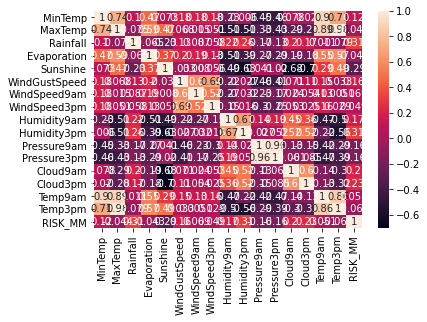

In [32]:
sn.heatmap(df.corr(),annot=True)

**LinePlot**

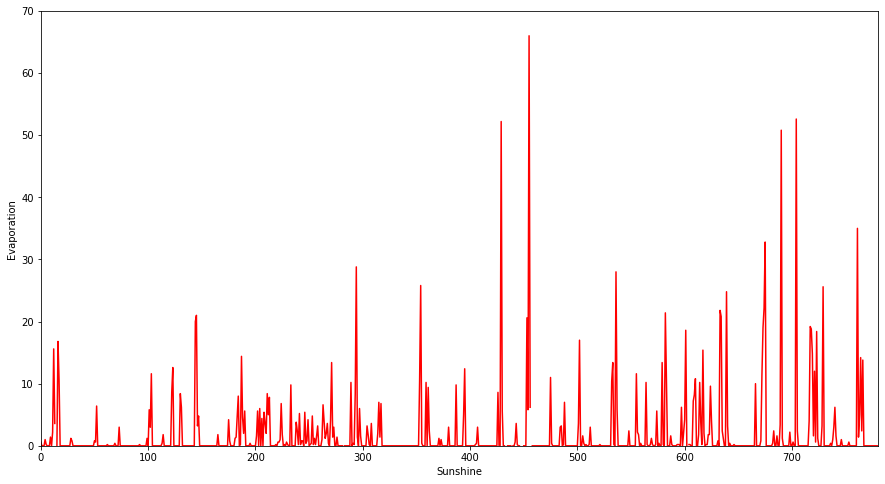

In [45]:
df['Rainfall'].plot(figsize=(15, 8), color='red') # color and figsize changed

plt.xlim(0, 780) # range for x-axis
plt.ylim(0, 70) # range for x-axis
plt.xlabel('Sunshine')
plt.ylabel('Evaporation');

*Scatterplot*

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

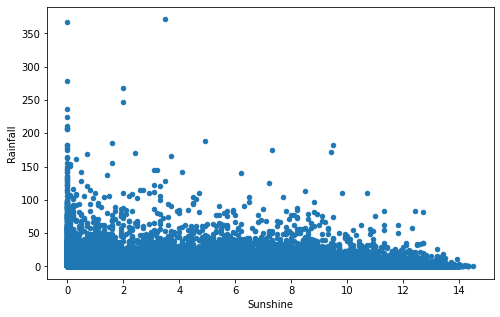

In [48]:
df.plot.scatter('Sunshine', 'Rainfall', figsize=(8, 5))

# The x and y labels are automatically taken from the column names

**Boxplot**

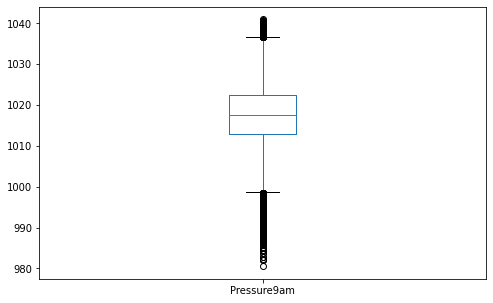

In [49]:
df['Pressure9am'].plot.box(figsize=(8, 5));

<AxesSubplot:>

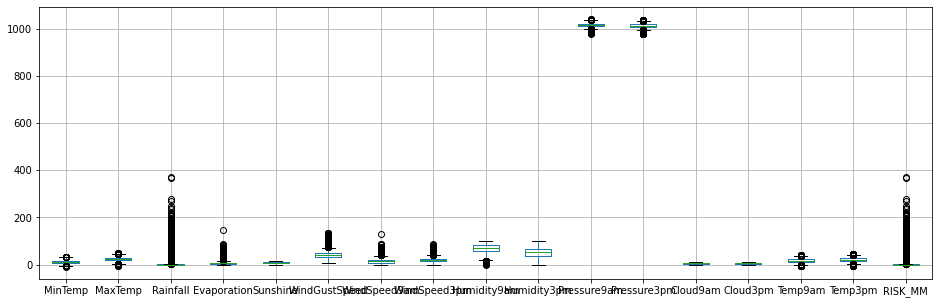

In [50]:
df.boxplot(figsize=(16, 5))

**Histogram**

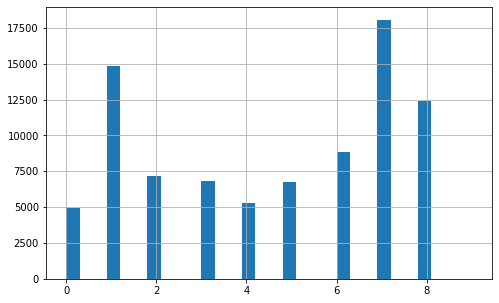

In [52]:
df['Cloud3pm'].hist(bins=30, figsize=(8, 5));

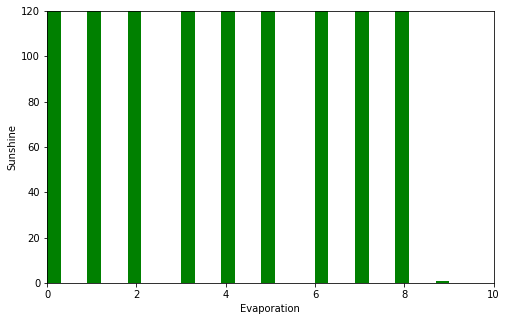

In [58]:
ax = df['Cloud3pm'].hist(bins=30, grid=False, color='green', figsize=(8, 5)) # grid turned off and color changed

ax.set_xlabel('Evaporation')
ax.set_ylabel('Sunshine')

ax.set_xlim(0,10 ) # limiting display range to 0-70 for the x-axis
ax.set_ylim(0, 120);

**Bar Plot**

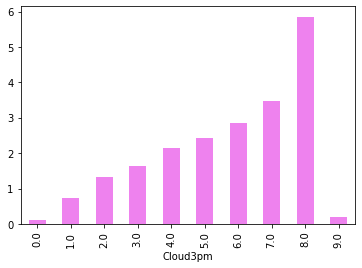

In [60]:
df_avg_BP = df.groupby('Cloud3pm')['Rainfall'].mean()
df_avg_BP[:10].plot.bar(color='violet');

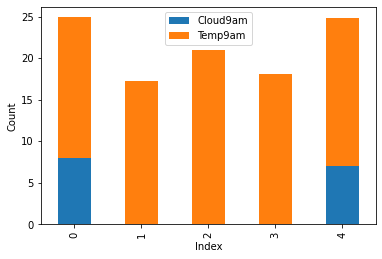

In [64]:
ax = df[['Cloud9am', 'Temp9am']][:5].plot.bar(stacked=True)

ax.set_xlabel("Index")
ax.set_ylabel("Count");

**Multiple Plots**

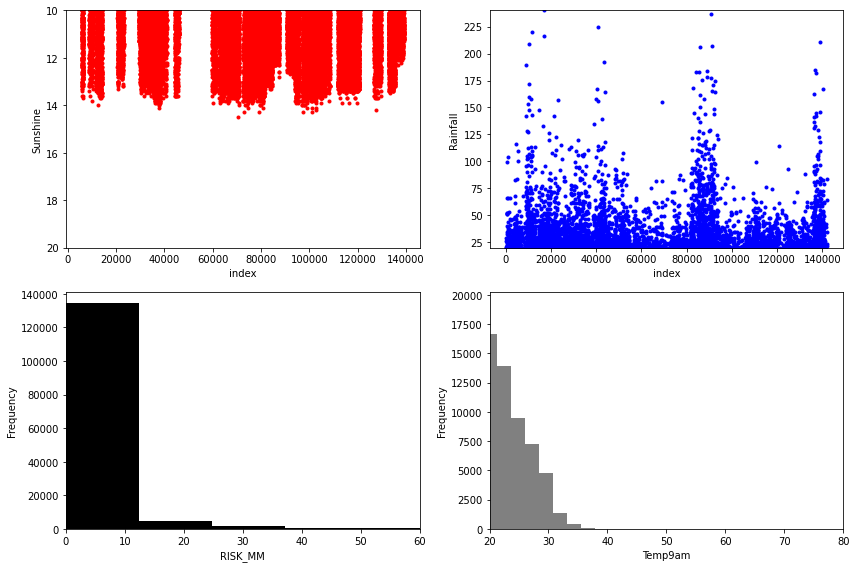

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# or fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(12, 8))

# axes is the axes object(s). It can be a single object or an array of objects. 
# In this case, it is an array of dimension 2-by-2

df['Sunshine'].plot(ax = axes[0][0], style='.', color='red') # top left
df['Rainfall'].plot(ax = axes[0][1], style='.', color='blue') # top right

df['RISK_MM'].plot.hist(bins=30, ax = axes[1][0], color='black') # bottom left
df['Temp9am'].plot.hist(bins=20, ax = axes[1][1], color='gray') # bottom right

axes[0][0].set_xlabel('index')
axes[0][1].set_xlabel('index')
axes[1][0].set_xlabel('RISK_MM')
axes[1][1].set_xlabel('Temp9am')

axes[0][0].set_ylabel('Sunshine')
axes[0][1].set_ylabel('Rainfall')

axes[0][0].set_ylim(20, 10)
axes[0][1].set_ylim(20, 240)

axes[1][0].set_xlim(0, 60)
axes[1][1].set_xlim(20, 80)

fig.tight_layout()